# Lab 3: Computation of Rotating Unbalance

In [1]:
%load_ext autoreload
%autoreload 2
import vibration_toolbox as vtb
#from vibration_toolbox import sdof_cf
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import math as math
import scipy.linalg as la

Interactive iPython tools will not work without IPython.display           and ipywidgets installed.
Interactive iPython tools will not work without IPython.display           and ipywidgets installed.


Using Vibration Toolbox
--------------------------------

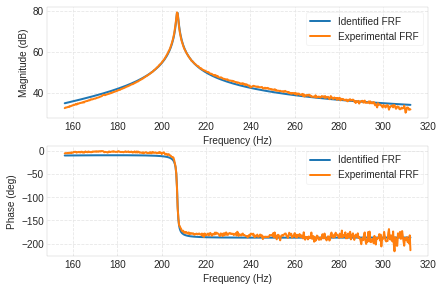

In [2]:
%matplotlib inline
mat_contents=sio.loadmat('Case3-1.mat')
Freq_domain = mat_contents['Freq_domain']
Hf_chan_2 = mat_contents['Hf_chan_2']
Fmin=500;
Fmax=1000;
[z,nf,a]=vtb.sdof_cf(Freq_domain,Hf_chan_2,Fmin,Fmax)

Power Spectrum Density plot
-------------------------------------


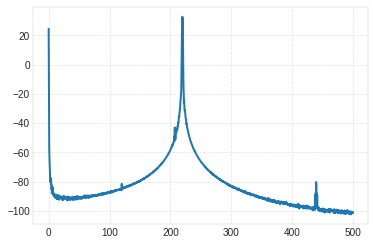

In [3]:

%matplotlib inline
mat_contents=sio.loadmat('Case3-5-Fn+10.mat')
Freq_domain = mat_contents['Freq_domain']
PSD_chan_2 = mat_contents['PSD_chan_2']

A=20*np.log10(PSD_chan_2);
plt.plot(Freq_domain,A)



Experimental Data Analysis
--------------------------------

In [4]:
mat_contents=sio.loadmat('Case3-5-Fn+10.mat')
Freq_domain = mat_contents['Freq_domain']
PSD_chan_2 = mat_contents['PSD_chan_2']
#Driving Freqency

y=np.where(PSD_chan_2==PSD_chan_2.max())

wr=(Freq_domain[y]) #in Hz
[a,b]=np.where(A==max(A));
#PSD_chan_2
wr


array([ 219.6875], dtype=float32)

In [5]:
mat_contents=sio.loadmat('Case3-1')
Freq_domain = mat_contents['Freq_domain']
Hf_chan_2 = mat_contents['Hf_chan_2']
HI=abs(Hf_chan_2);
h=HI[a]#inertance in 1/kg
h

array([[ 343.37321191]])

Acceleration Response Plot
---------------------------------

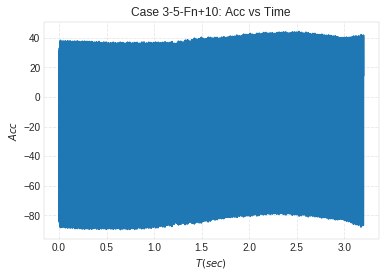

In [6]:

mat_contents=sio.loadmat('Case3-5-Fn+10')
Time_domain = mat_contents['Time_domain']
Time_chan_2 = mat_contents['Time_chan_2']
plt.plot(Time_domain,(Time_chan_2*9.81))
plt.title('Case 3-5-Fn+10: Acc vs Time')
plt.xlabel('$T(sec)$')
plt.ylabel('$Acc$')#  Disp vs Time



    

Data Analysis
---------------

In [7]:
Amax=max((Time_chan_2*9.81)-1);
Xmax=(Amax)/(wr*2*math.pi)**2 #max displ
Xmax

array([  2.25356289e-05], dtype=float32)

In [8]:
r=wr/nf #freq ratio
r

array([ 1.06112647], dtype=float32)

In [9]:
moe=Xmax/h #experimental rotating unbalance
moe

array([[  6.56301310e-08]])

Beam Properties
-------------------

In [10]:
l=21.75*0.0254;# length in meters
h=0.5*0.0254;# height in meters
w=1*0.0254;# width in meters
rho=2700;# density in kg/cubicmeter
V = l*w*h;# volume (m^3)
m=rho*V
m


0.4811651667

Analytical rotating unbalance
-----------------------------------

In [11]:
moeA=m*Xmax*math.sqrt((1-r**2)**2+(2*z*r)**2)/(r**2)
moeA

array([  1.21395442e-06], dtype=float32)